In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("IMDB Movie.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [5]:
df.shape

(50000, 2)

In [6]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

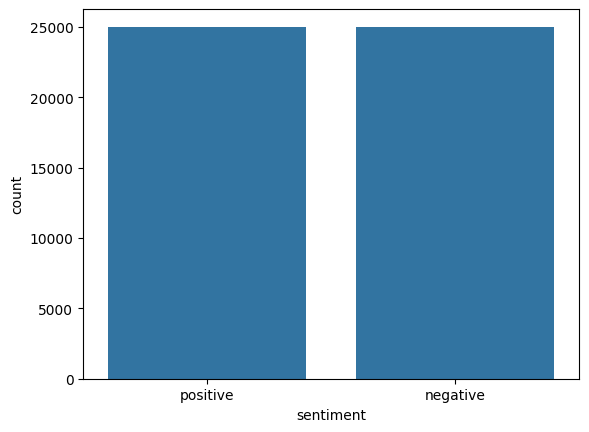

In [7]:
import seaborn as sns
sns.countplot(x='sentiment',data=df)

In [8]:
positive_review=list(df[df['sentiment']=='positive']['review'])[:100]
negative_review=list(df[df['sentiment']=='negative']['review'])[:100]

In [9]:
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [10]:
def create_cloud(string, title=None):
    cloud = WordCloud(height=1080,
                     width=1920,
                     background_color='white',
                     min_font_size=10,
                     stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(10, 20))
    plt.imshow(cloud)
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':24})
    plt.show()

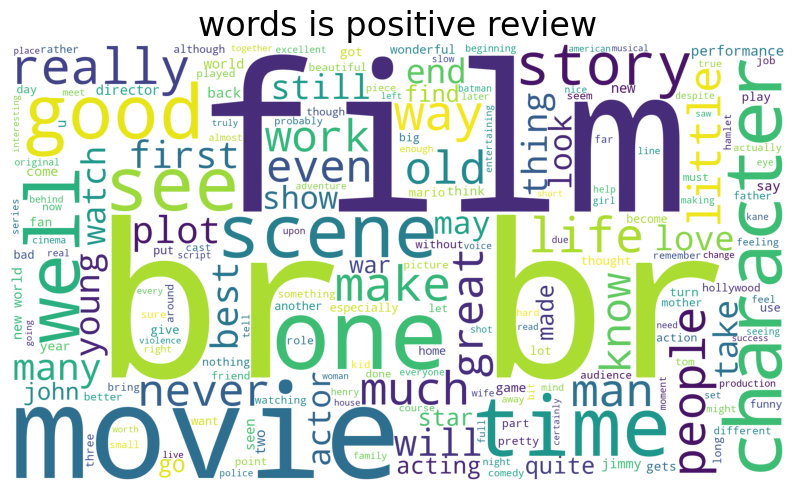

In [11]:
create_cloud(' '.join(positive_review).lower(), 'words is positive review')

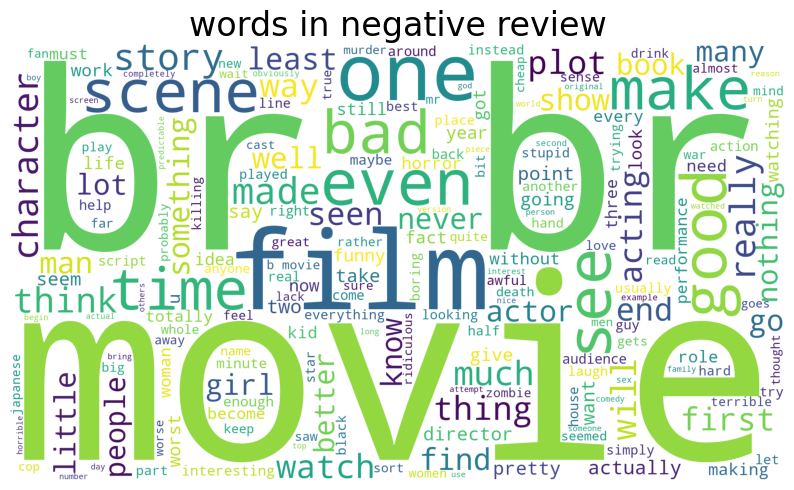

In [12]:
create_cloud(' '.join(negative_review).lower(),'words in negative review')

In [13]:
def text_processing(data):
    from bs4 import BeautifulSoup
    import re
    def decontracted(phrase):
        # specific
        phrase= re.sub(r'<br /><br />',' ',phrase)
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase
    stopwords=set(STOPWORDS)

    # Combining all the above sentence
    from tqdm import tqdm
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data['review'].values):
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords)
        preprocessed_reviews.append(sentance.strip())
    
    from nltk.stem import PorterStemmer

    porter = PorterStemmer()
    list_of_sentence=[]
    for  sentence in preprocessed_reviews:
        words_in_sentence=[]
        for words in sentence.split():
            words_in_sentence.append(porter.stem(words))

        list_of_sentence.append(' '.join(words_in_sentence))
    return(list_of_sentence)

In [14]:
x=text_processing(df[:1000])

 80%|█████████████████████████████████████████████████████████████▌               | 799/1000 [00:00<00:00, 2044.57it/s]C:\Users\RealTime\AppData\Local\Temp\ipykernel_3020\2228875265.py:29: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentance = BeautifulSoup(sentance, 'lxml').get_text()
100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2027.60it/s]


In [15]:
df = df[:1000]

In [16]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [17]:
df['cleaned_review']=x

In [18]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod will hooked...
1,A wonderful little production. <br /><br />The...,positive,a wonder littl production. the film techniqu u...
2,I thought this was a wonderful way to spend ti...,positive,i thought wonder way spend time hot summer wee...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy (jake) think zombi clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [19]:
X = df['cleaned_review']
Y = df['sentiment']

In [20]:
X

0      one review mention watch oz episod will hooked...
1      a wonder littl production. the film techniqu u...
2      i thought wonder way spend time hot summer wee...
3      basic famili littl boy (jake) think zombi clos...
4      petter mattei love time money visual stun film...
                             ...                        
995    noth sacred. just ask erni fosselius. these da...
996    i hate it. i hate self-awar pretenti inan masq...
997    i usual tri profession construct i critic movi...
998    if go see film histori class someth school, tr...
999    thi zoolog textbook, given depict anim accurat...
Name: cleaned_review, Length: 1000, dtype: object

In [21]:
Y

0      positive
1      positive
2      positive
3      negative
4      positive
         ...   
995    positive
996    negative
997    negative
998    negative
999    negative
Name: sentiment, Length: 1000, dtype: object

In [22]:
Y = list(Y)
for i in range(len(Y)):
    if Y[i]=='positive':
        Y[i]=1
    else:
        Y[i]=0
        
df['sentiment_score']=Y

Y=df['sentiment_score']

In [23]:
df

,review,sentiment,cleaned_review,sentiment_score
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod will hooked...,1
1,A wonderful little production. <br /><br />The...,positive,a wonder littl production. the film techniqu u...,1
2,I thought this was a wonderful way to spend ti...,positive,i thought wonder way spend time hot summer wee...,1
3,Basically there's a family where a little boy ...,negative,basic famili littl boy (jake) think zombi clos...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...,1
...,...,...,...,...
995,Nothing is sacred. Just ask Ernie Fosselius. T...,positive,noth sacred. just ask erni fosselius. these da...,1
996,I hated it. I hate self-aware pretentious inan...,negative,i hate it. i hate self-awar pretenti inan masq...,0
997,I usually try to be professional and construct...,negative,i usual tri profession construct i critic movi...,0
998,If you like me is going to see this in a film ...,negative,"if go see film histori class someth school, tr...",0


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X[:1000], Y[:1000], test_size=0.3, random_state=0)

In [26]:
X_train

105    marion davi star remark comedi show peopl rele...
68     i sure produc need trade name somewhat success...
479    joseph bradi clarenc doolittl two sailors, fou...
399    thi movi fairli entertain comedi murphi law ap...
434    yes, indeed, good movie. a love biangle, (sorr...
                             ...                        
835    the stori told before. a deadli diseas spread ...
192    nifti littl episod play mainli laughs, clever ...
629    let keep simple: my two kid glu movie. it flaw...
559    so i rent netflix somebodi gave roger ebert bo...
684    the perfect murder foil wife(play mari ellen t...
Name: cleaned_review, Length: 700, dtype: object

In [27]:
y_train

105    1
68     0
479    1
399    1
434    0
      ..
835    1
192    1
629    1
559    0
684    0
Name: sentiment_score, Length: 700, dtype: int64

In [28]:
list(y_test).count(0)

162

In [29]:
list(y_test).count(1)

138

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [31]:
X_train_bow.shape, X_test_bow.shape

((700, 12936), (300, 12936))

In [32]:
X_test_bow

<300x12936 sparse matrix of type '<class 'numpy.int64'>'
	with 28221 stored elements in Compressed Sparse Row format>

In [33]:
X_train.shape, X_test.shape

((700,), (300,))

In [34]:
y_train.shape, y_test.shape

((700,), (300,))

# (1) KNN Algorithm

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
for i in range(10,30):
    
    print('K',i)
    
    # initialization
    neigh = KNeighborsClassifier(n_neighbors=i)
    
    # Training
    neigh.fit(X_train_bow, y_train)
    
    # Test the training data
    y_pred_train = neigh.predict(X_train_bow)
    accuracy_train = accuracy_score(y_pred_train,y_train)
    f1_train = f1_score(y_pred_train,y_train)
   
    # Test the test data
    y_pred_test = neigh.predict(X_test_bow)
    accuracy_test = accuracy_score(y_pred_test,y_test)
    f1_test = f1_score(y_pred_test,y_test)
   
    print(accuracy_train,accuracy_test)
    print(f1_train,f1_test)
    print()

K 10
0.69 0.5533333333333333
0.7290886392009986 0.5838509316770186

K 11
0.66 0.5333333333333333
0.7337807606263983 0.6089385474860335

K 12
0.6757142857142857 0.55
0.7241798298906439 0.5896656534954408

K 13
0.6614285714285715 0.5066666666666667
0.7363737486095662 0.6

K 14
0.6914285714285714 0.53
0.7422434367541767 0.5936599423631124

K 15
0.6528571428571428 0.5166666666666667
0.7338444687842279 0.6214099216710183

K 16
0.6742857142857143 0.5366666666666666
0.733644859813084 0.6084507042253522

K 17
0.6414285714285715 0.5233333333333333
0.7238723872387239 0.6285714285714286

K 18
0.6571428571428571 0.56
0.725400457665904 0.641304347826087

K 19
0.6257142857142857 0.5133333333333333
0.7164502164502164 0.6256410256410257

K 20
0.6428571428571429 0.5533333333333333
0.7203579418344519 0.6417112299465241

K 21
0.6071428571428571 0.5266666666666666
0.7089947089947091 0.6377551020408163

K 22
0.6271428571428571 0.5433333333333333
0.7159956474428727 0.6422976501305483

K 23
0.6 0.53
0.708939

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
    
# initialization
neigh = KNeighborsClassifier(n_neighbors=20)

# Training
neigh.fit(X_train_bow, y_train)

# Test the training data
y_pred_train = neigh.predict(X_train_bow)
accuracy_train = accuracy_score(y_pred_train,y_train)
f1_train = f1_score(y_pred_train,y_train)


# Test the test data
y_pred_test = neigh.predict(X_test_bow)
accuracy_test = accuracy_score(y_pred_test,y_test)
f1_test = f1_score(y_pred_test,y_test)


print(accuracy_train,accuracy_test)
print(f1_test,f1_test)

0.6428571428571429 0.5533333333333333
0.6417112299465241 0.6417112299465241


In [37]:
X_train_bow

<700x12936 sparse matrix of type '<class 'numpy.int64'>'
	with 71438 stored elements in Compressed Sparse Row format>

# (2) Naive Bayes classifier

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics

In [39]:
# GaussianNB

In [40]:
X_train = X_train_bow.toarray()

In [41]:
G_classifier = GaussianNB()

In [42]:
G_classifier.fit(X_train, y_train)

GaussianNB()

In [43]:
X_test = X_test_bow.toarray()
predictions_G = G_classifier.predict(X_test)

In [44]:
predictions_G

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0], d

In [45]:
accuracy = metrics.accuracy_score(y_test, predictions_G)

In [46]:
accuracy

0.6233333333333333

In [47]:
# BernoulliNB

In [48]:
B_classifier = BernoulliNB()

In [49]:
B_classifier.fit(X_train, y_train)

BernoulliNB()

In [50]:
predictions_B = B_classifier.predict(X_test)

In [51]:
predictions_B

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0], d

In [52]:
accuracy_B = metrics.accuracy_score(y_test, predictions_B)

In [53]:
accuracy_B

0.81

In [54]:
# MultinomialNB

In [55]:
M_classifier = MultinomialNB()

In [56]:
M_classifier.fit(X_train, y_train)

MultinomialNB()

In [57]:
predictions_M = M_classifier.predict(X_test)

In [58]:
predictions_M

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0], d

In [59]:
accuracy_M = metrics.accuracy_score(predictions_M, y_test)

In [60]:
accuracy_M

0.7866666666666666

In [61]:
# GaussianNB
# BernoulliNB
# MultinomialNB

# Being the best of them | BernoulliNB |

# (3) Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
clf = DecisionTreeClassifier()

In [64]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
y_pred = clf.predict(X_test)

In [66]:
accuracy = metrics.accuracy_score(y_pred, y_test)

In [67]:
accuracy

0.6933333333333334

# (4) Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [70]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
y_pred = rf_classifier.predict(X_test)

In [72]:
accuracy = metrics.accuracy_score(y_test, y_pred)

In [73]:
accuracy

0.8166666666666667

# (5) Boosting Algorithm

In [74]:
from sklearn.ensemble import AdaBoostClassifier

In [75]:
base_classifier = DecisionTreeClassifier(max_depth=1)

In [76]:
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

In [77]:
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [78]:
y_pred = adaboost_classifier.predict(X_test)

In [79]:
accuracy = metrics.accuracy_score(y_test, y_pred)

In [80]:
accuracy

0.7566666666666667

# Being the best of them | BernoulliNB |
# accuracy 8.1